<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORT NEEDED LIBRARIES
    </h1>
    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot,plot
from plotly.subplots import make_subplots

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Getting Info
    </h1>
    </div>

In [2]:
df = pd.read_csv("/kaggle/input/online-shopping-dataset/file.csv")

In [3]:
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [4]:
df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [6]:
# Number of Shape Before Cleaning
df.shape

(52955, 21)

In [7]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [8]:
# Info of categorical data
df.describe(exclude = np.number)

,Gender,Location,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status,Date,Coupon_Code
count,52924,52924,52924,52924,52924,52955,52924,52924,52555
unique,2,5,365,1145,404,21,3,365,48
top,F,Chicago,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,11/27/2019,SALE20
freq,33007,18380,335,3511,3511,18126,26926,335,6373


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Info after Cleaning
    </h1>
    </div>

In [9]:
df.drop(columns = ['Unnamed: 0','CustomerID','Transaction_ID','Product_Description','Product_SKU','Coupon_Code','Discount_pct'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            52924 non-null  object 
 1   Location          52924 non-null  object 
 2   Tenure_Months     52924 non-null  float64
 3   Transaction_Date  52924 non-null  object 
 4   Product_Category  52955 non-null  object 
 5   Quantity          52924 non-null  float64
 6   Avg_Price         52924 non-null  float64
 7   Delivery_Charges  52924 non-null  float64
 8   Coupon_Status     52924 non-null  object 
 9   GST               52924 non-null  float64
 10  Date              52924 non-null  object 
 11  Offline_Spend     52924 non-null  float64
 12  Online_Spend      52924 non-null  float64
 13  Month             52955 non-null  int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 5.7+ MB


In [11]:
# Shape after Clean
df.shape

(52955, 14)

In [12]:
# Remove Missing Values
df.dropna(thresh=5,inplace=True)

In [13]:
df.isna().sum()

Gender              0
Location            0
Tenure_Months       0
Transaction_Date    0
Product_Category    0
Quantity            0
Avg_Price           0
Delivery_Charges    0
Coupon_Status       0
GST                 0
Date                0
Offline_Spend       0
Online_Spend        0
Month               0
dtype: int64

In [14]:
print(f"Columns of Dataset :\n{df.columns}")

Columns of Dataset :
Index(['Gender', 'Location', 'Tenure_Months', 'Transaction_Date',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month'],
      dtype='object')


In [15]:
df.describe()

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month
count,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,26.127995,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652388
std,13.478285,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333364
min,2.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000
25%,15.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000
50%,27.000000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000
75%,37.000000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000
max,50.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000


In [16]:
df.head(10)

,Gender,Location,Tenure_Months,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month
0,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1
1,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1
2,M,Chicago,12.0,2019-01-01,Nest-USA,2.0,122.77,6.50,Not Used,0.1,1/1/2019,4500.0,2424.5,1
3,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,81.50,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1
4,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1
5,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1
6,M,Chicago,12.0,2019-01-01,Nest-USA,2.0,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1
7,M,Chicago,12.0,2019-01-01,Nest-USA,2.0,81.50,6.50,Not Used,0.1,1/1/2019,4500.0,2424.5,1
8,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,256.88,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1
9,M,Chicago,12.0,2019-01-01,Nest-USA,1.0,153.71,28.78,Clicked,0.1,1/1/2019,4500.0,2424.5,1


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Number of Male and Female?
    </h1>
    </div>

In [17]:
print(f"Number of Male '{df['Gender'].value_counts()[1]}' and Female '{df['Gender'].value_counts()[0]}'")

Number of Male '19917' and Female '33007'


In [18]:
iplot(px.pie(values=df['Gender'].value_counts(),
             names=['Female','Male'],
             title='Number Of Female and Male'
).update_traces(textinfo='label+value+percent'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Locations
    </h1>
    </div>

In [19]:
Locations = df['Location'].value_counts().sort_values(ascending=False)
print(f"Most Location {Locations.index[0]} with {Locations[0]}")

Most Location Chicago with 18380


In [20]:
iplot(px.bar(Locations,
             color=Locations.index,
             text_auto=True,
             labels={'index':'Location','value':'Count'},
             title='Locations with count'
))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Tenure Months
    </h1>
    </div>

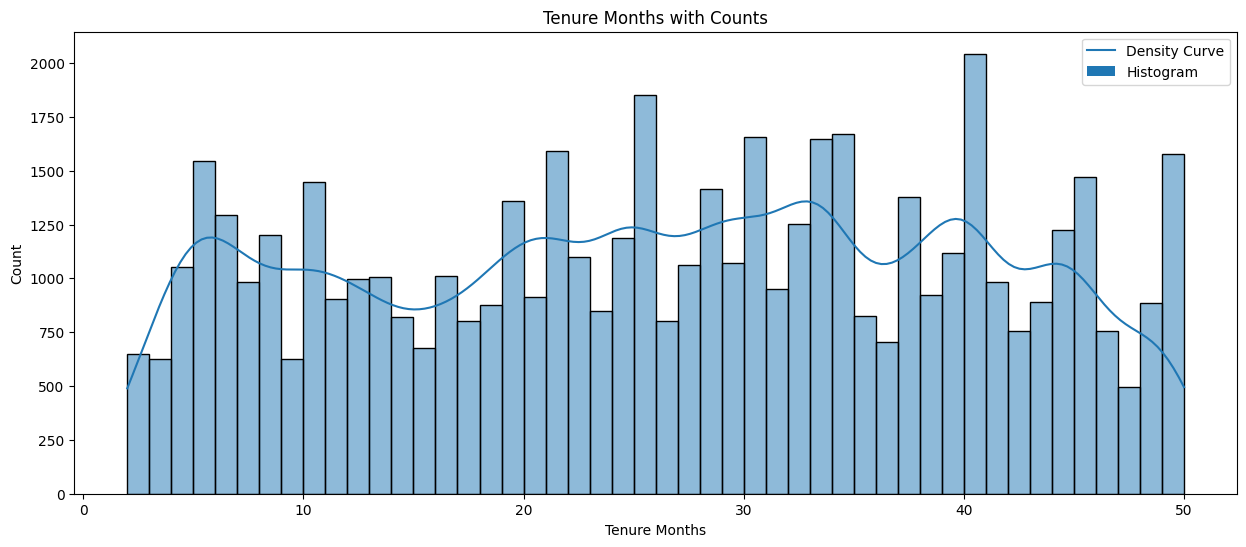

In [21]:
fig , ax  = plt.subplots(figsize=(15,6))
sns.histplot(df['Tenure_Months'],kde=True,bins=48,ax=ax)
ax.set_xlabel('Tenure Months')
ax.set_title("Tenure Months with Counts")
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [22]:
Tenure_Months = df['Tenure_Months'].value_counts().sort_values(ascending=False)[:20]
iplot(px.bar(Tenure_Months,
             color=Tenure_Months,
             labels={'value':'Count','index':'Tenure Months'},
             title='Value Count of Tenure Months',
             text_auto=True
).update_xaxes(type='category'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Transaction Dates
    </h1>
    </div>

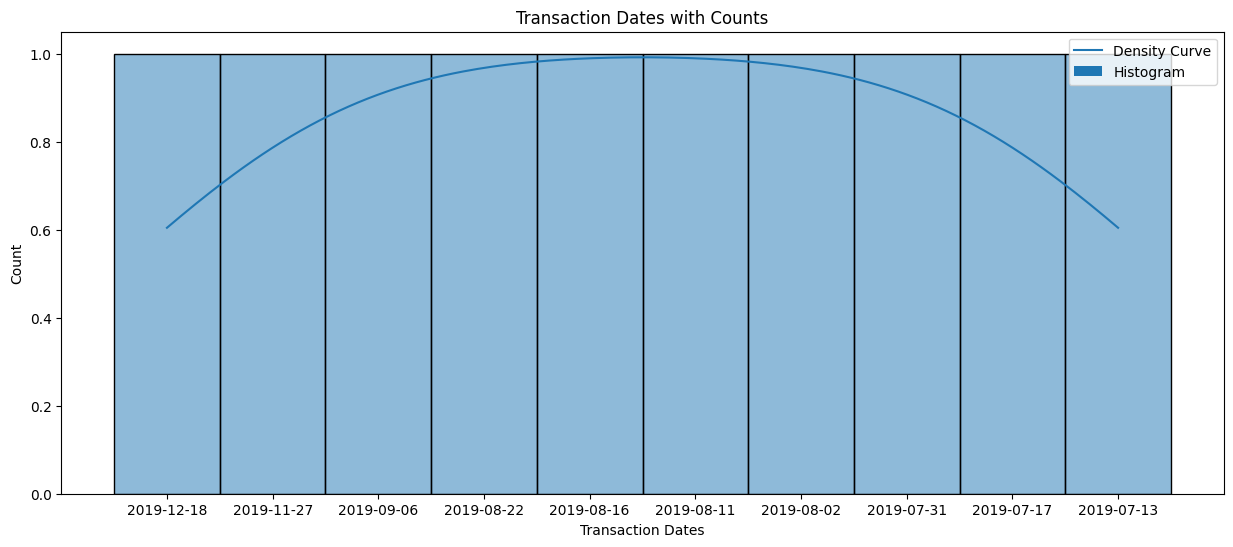

In [23]:
Dates = df['Transaction_Date'].value_counts()[:10]
Dates = Dates.sort_index(ascending=False)
fig , ax = plt.subplots(figsize=(15,6))
sns.histplot(Dates.index,kde=True,ax=ax)
ax.set_xlabel('Transaction Dates')
ax.set_title('Transaction Dates with Counts')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [24]:
# Most Transaction Dates
iplot(px.bar(Dates.sort_index(ascending=True),
             color=Dates,
             title='Most Transaction Dates',
             labels={'index':'Day','value':'Count'},
             text_auto=True
).update_xaxes(type='category'))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Product Category
    </h1>
    </div>

In [25]:
Category = df['Product_Category'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Count of Product Category',
             text_auto=True,
             orientation='h'
))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Quantity
    </h1>
    </div>

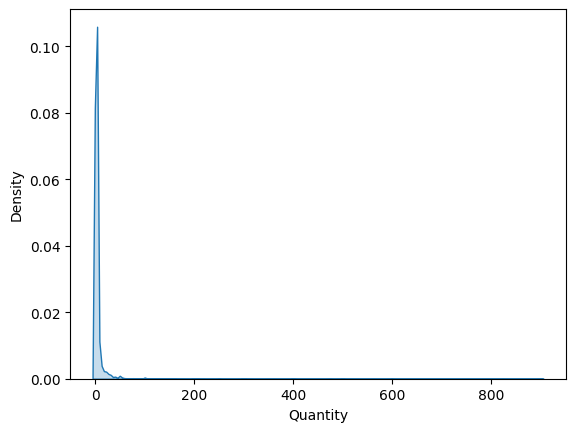

In [26]:
sns.kdeplot(x = df["Quantity"], fill = True)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Avg Price
    </h1>
    </div>

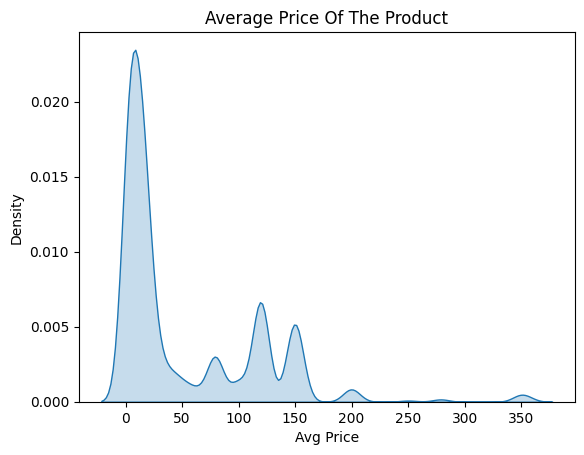

In [27]:
sns.kdeplot(df['Avg_Price'],fill=True)
plt.title('Average Price Of The Product')
plt.xlabel('Avg Price')
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Delivery Charges
    </h1>
    </div>

In [28]:
delivary_charrges = df['Delivery_Charges'].value_counts()
print(f"Most Dilivary Charge is {delivary_charrges.index.max()} and least dilivary charge is {delivary_charrges.index.min()} as free")

Most Dilivary Charge is 521.36 and least dilivary charge is 0.0 as free


<Axes: >

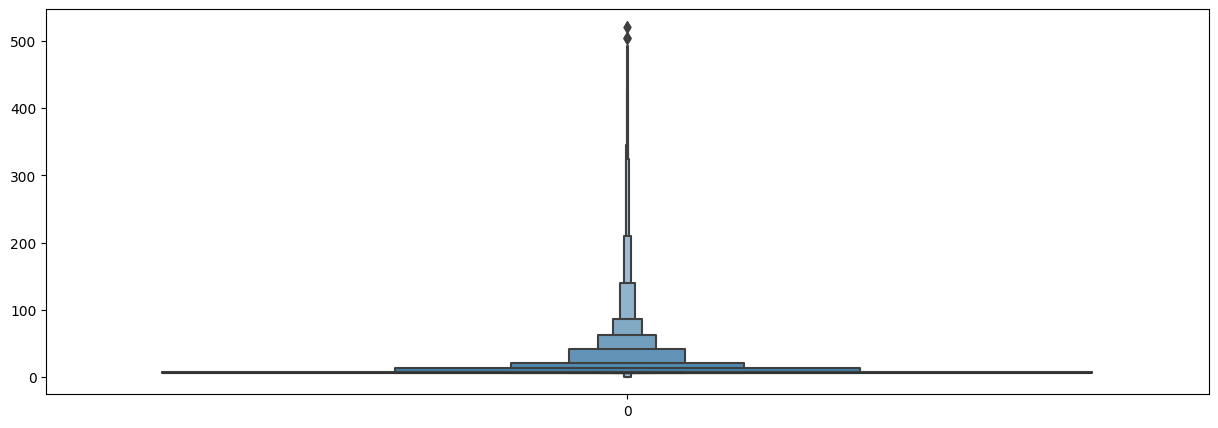

In [29]:
plt.figure(figsize=(15,5))
sns.boxenplot(df['Delivery_Charges'])

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Coupon Status
    </h1>
    </div>

In [30]:
iplot(px.pie(values=df['Coupon_Status'].value_counts(),
             names=['Clicked','Used','Not Used'],
             title='Coubon Status',
).update_traces(textinfo=('percent+value')))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       GST
    </h1>
    </div>

In [31]:
iplot(px.bar(df['GST'].value_counts(),
             color=df['GST'].value_counts().index,
             title='GST',
             labels={'index':'GST','value':'Count'},
             text_auto=True
))

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Online and Offline Spend	ber Month
    </h1>
    </div>

In [32]:
# Spend Online
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_spending_online = df.groupby('Month')['Online_Spend'].sum()

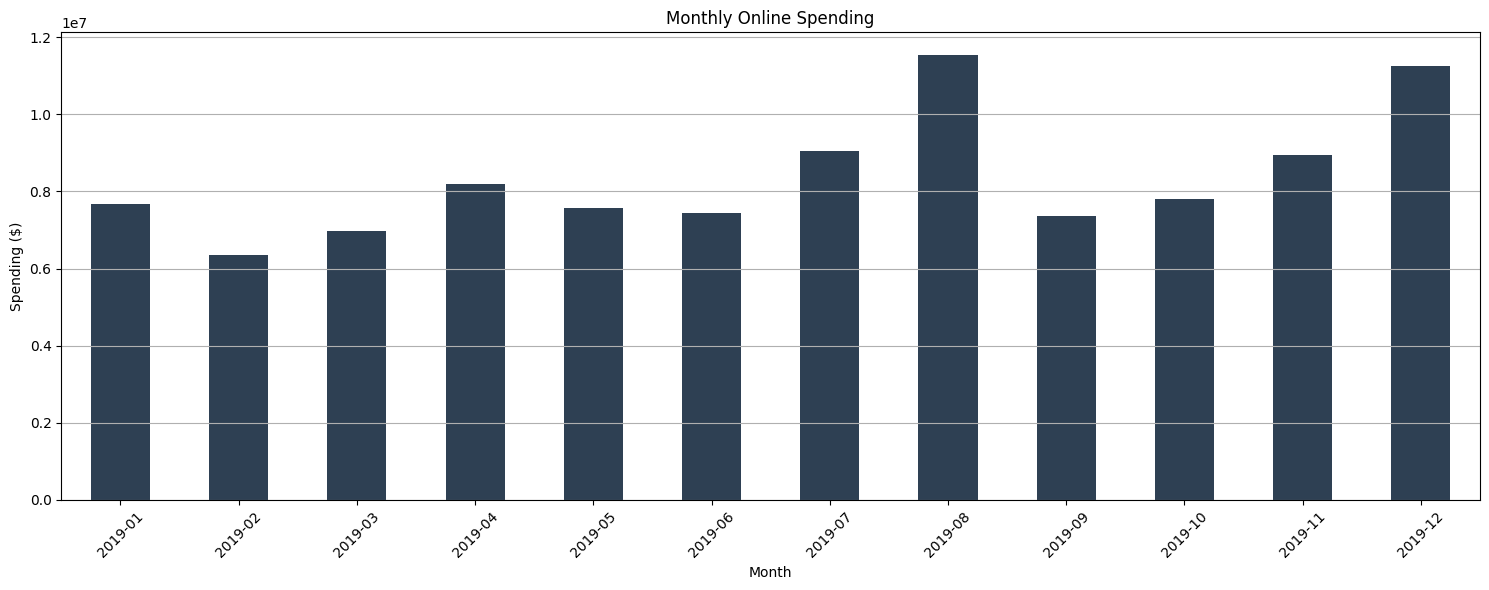

In [33]:
plt.figure(figsize=(15,6))
monthly_spending_online.plot(kind='bar', color='#2E4053')
plt.title('Monthly Online Spending')
plt.xlabel('Month')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_spending_offline = df.groupby('Month')['Offline_Spend'].sum()

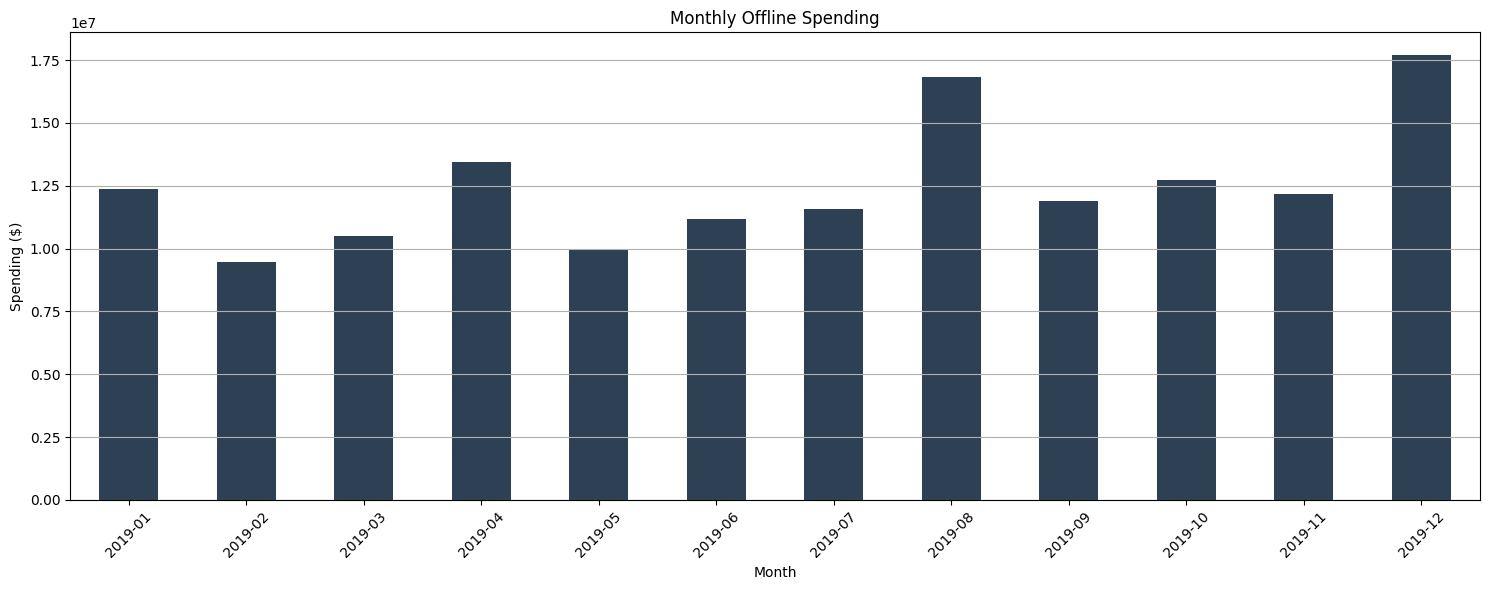

In [35]:
plt.figure(figsize=(15,6))
monthly_spending_offline.plot(kind='bar', color='#2E4053')
plt.title('Monthly Offline Spending')
plt.xlabel('Month')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Distributions
    </h1>
    </div>

In [36]:
histogram_labels = ['Tenure_Months',
                    'Quantity',
                    'Delivery_Charges',
                    'GST',
                    'Offline_Spend',
                    'Online_Spend',
                   ]
colors = px.colors.qualitative.Plotly
for i in range(len(histogram_labels)):
  fig = px.histogram(df,
                     histogram_labels[i],
                     title=f'{histogram_labels[i]} distribution in top hits',
                     color_discrete_sequence=[colors[i]]
                     )
  iplot(fig)